# Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import mapclassify
import numpy as np

# Data Loading and Pre-processing

In [2]:
file_name =  "ERC_formatted.xlsx"

# loading DataFrames
pocet_obyvatelov = pd.read_excel(io=file_name, sheet_name=0)
# pocet_obyvatelov_bez_spocitanych = pd.read_excel(io=file_name, sheet_name=11)
narodeni = pd.read_excel(io=file_name, sheet_name=1)
zomreti = pd.read_excel(io=file_name, sheet_name=2)
vnutorna_migracia_pristahovani = pd.read_excel(io=file_name, sheet_name=3)
vnutorna_migracia_vystahovani = pd.read_excel(io=file_name, sheet_name=4)
zahranicna_migracia_vystahovani = pd.read_excel(io=file_name, sheet_name=5)
zahranicna_migracia_pristahovani = pd.read_excel(io=file_name, sheet_name=6)
priemerna_mzda = pd.read_excel(io=file_name, sheet_name=7)
zamestnanost = pd.read_excel(io=file_name, sheet_name=8)
pocet_gymnazii = pd.read_excel(io=file_name, sheet_name=9)
pocet_strednych_odbornych_skol = pd.read_excel(io=file_name, sheet_name=10)

# arrays of names and dataframes
dataframes = [pocet_obyvatelov, narodeni, zomreti, vnutorna_migracia_pristahovani, vnutorna_migracia_vystahovani, zahranicna_migracia_vystahovani, zahranicna_migracia_pristahovani, priemerna_mzda, zamestnanost, pocet_gymnazii, pocet_strednych_odbornych_skol]
names_of_datagrames = ["pocet_obyvatelov", "narodeni", "zomreti", "vnutorna_migracia_pristahovani", "vnutorna_migracia_vystahovani", "zahranicna_migracia_vystahovani", "zahranicna_migracia_pristahovani", "priemerna_mzda", "zamestnanost", "pocet_gymnazii", "pocet_strednych_odbornych_skol"]

# creating dictionary of dataframes for each year from 2010 to 2021
years = {}
for year in range(2010,2022):
    years[year] = pd.DataFrame(pocet_obyvatelov["Okres"])
    for i in range(len(dataframes)):
        years[year][names_of_datagrames[i]] = dataframes[i][year]


In [3]:
# check if every dataframe column "Okres" is the same in every dataframe, print only true or false
print(pocet_obyvatelov["Okres"].to_list() == narodeni["Okres"].to_list() == zomreti["Okres"].to_list() == vnutorna_migracia_pristahovani["Okres"].to_list() == vnutorna_migracia_vystahovani["Okres"].to_list() == zahranicna_migracia_vystahovani["Okres"].to_list() == zahranicna_migracia_pristahovani["Okres"].to_list() == priemerna_mzda["Okres"].to_list() == zamestnanost["Okres"].to_list() == pocet_gymnazii["Okres"].to_list() == pocet_strednych_odbornych_skol["Okres"].to_list())

True


# MISC commands (debug tools)

In [4]:
# MISC getting row of Okres Bratislava I
# print(years[2010][years[2010]["Okres"] == "Okres Bratislava I"])

In [5]:
# # plotting correlation heatmap for every year
# for year in range(2010,2022):
#     correlation_matrix_data = years[year]
    
#     mask = np.triu(np.ones_like(correlation_matrix_data.corr(), dtype=bool))
#     # print(correlation_matrix_data.corr())
#     dataplot=sb.heatmap(correlation_matrix_data.corr(), annot=True, cmap="YlGnBu", mask = mask)

#     # displaying heatmaps
#     plt.show()

In [6]:
# from scipy.optimize import curve_fit

# # this is the function we want to fit
# def func(x, a, c):
#     return a*x*x + c

# p_opt, p_cov = curve_fit(func, years[YEAR][X], years[YEAR][Y])

# print(p_opt)
# a, c = p_opt
# sb.scatterplot(data=years[YEAR], x=X, y=Y) # hue="Okres"
# sb.lmplot(data=years[YEAR], x=X, y=Y, line_kws={"color": "red"})
# plt.plot(years[YEAR][X], func(years[YEAR][X], a, c), "g--", label="fit: a=%5.3f, c=%5.3f" % tuple(p_opt))


In [7]:
# def average_correlation_coefficient(X, Y):
#     sum_of_correlations = 0
#     for year in range(2010,2022):
#         sum_of_correlations += years[year][X].corr(years[year][Y])
#         print(year, ": ", years[year][X].corr(years[year][Y]))
#     print(sum_of_correlations / 12)
#     return sum_of_correlations / 12



# Average correlation heatmap

,Okres,pocet_obyvatelov,narodeni,zomreti,vnutorna_migracia_pristahovani,vnutorna_migracia_vystahovani,zahranicna_migracia_vystahovani,zahranicna_migracia_pristahovani,priemerna_mzda,zamestnanost,pocet_gymnazii,pocet_strednych_odbornych_skol
0,Okres Bratislava I,38603,444,534,1198,1078,42,270,1275,67842,5,4
1,Okres Bratislava II,108035,1447,1216,3008,2504,75,229,1327,67631,12,16
2,Okres Bratislava III,60771,768,841,1887,1489,21,179,1173,51503,3,13
3,Okres Bratislava IV,91804,1093,809,2339,2083,71,220,1061,27949,8,7
4,Okres Bratislava V,111279,1411,778,1818,3087,80,137,1073,20348,9,15


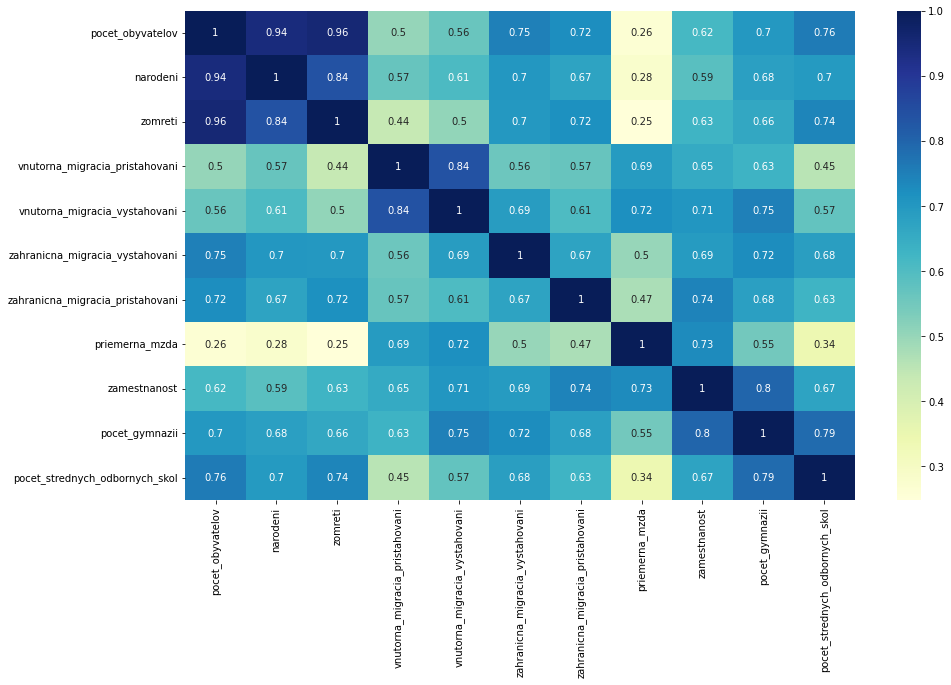

In [8]:
# sb.set(font_scale=2)
sum_of_correlations = years[2010].corr()

for year in range(2011,2022):
    sum_of_correlations += years[year].corr()

sum_of_correlations = sum_of_correlations / 12

fig, ax = plt.subplots(figsize=(15,9)) 

mask = np.triu(np.ones_like(years[2010].corr(), dtype=bool))
dataplot=sb.heatmap(sum_of_correlations, annot=True, cmap="YlGnBu", ax = ax)
plt.savefig("map.png", transparent=True, bbox_inches = 'tight')

years[2010].head()

---

#### DIVNE STATISTICKE VYPOCTY V PYTHONE NA DATAFRAMES

In [9]:
# 
"""
# priemer vsetkych okresov
print("Mean: ", priemerna_mzda.mean())

# minimum vsetkych okresov
print("Min", priemerna_mzda.min())

# maximum vsetkych okresov
print("Max", priemerna_mzda.max())

# dolny kvartil vsetkych okresov
print("Dolny kvartil",priemerna_mzda.quantile(0.25))

# horny kvartil vsetkych okresov
print("Horny kvartil", priemerna_mzda.quantile(0.75))

# median vsetkych okresov
print("median",priemerna_mzda.median())

# standardna odchylka vsetkych okresov
print("standardna odchylka",priemerna_mzda.std())

# smerodajna odchylka vsetkych okresov
print("smerodajna odchylka",priemerna_mzda.mad())

# interkvartilovy rozsah vsetkych okresov
print("interkvartilovy rozsah",priemerna_mzda.quantile(0.75) - priemerna_mzda.quantile(0.25))

# rozpatie vsetkych okresov
print("rozpatie vsetkych okresov",priemerna_mzda.max() - priemerna_mzda.min())

# koeficient kvartilovej odchýlky vsetkych okresov
print("koeficient kvartilovej odchýlky", (priemerna_mzda.quantile(0.75) - priemerna_mzda.quantile(0.25)) / (priemerna_mzda.max() - priemerna_mzda.min()))
"""

'\n# priemer vsetkych okresov\nprint("Mean: ", priemerna_mzda.mean())\n\n# minimum vsetkych okresov\nprint("Min", priemerna_mzda.min())\n\n# maximum vsetkych okresov\nprint("Max", priemerna_mzda.max())\n\n# dolny kvartil vsetkych okresov\nprint("Dolny kvartil",priemerna_mzda.quantile(0.25))\n\n# horny kvartil vsetkych okresov\nprint("Horny kvartil", priemerna_mzda.quantile(0.75))\n\n# median vsetkych okresov\nprint("median",priemerna_mzda.median())\n\n# standardna odchylka vsetkych okresov\nprint("standardna odchylka",priemerna_mzda.std())\n\n# smerodajna odchylka vsetkych okresov\nprint("smerodajna odchylka",priemerna_mzda.mad())\n\n# interkvartilovy rozsah vsetkych okresov\nprint("interkvartilovy rozsah",priemerna_mzda.quantile(0.75) - priemerna_mzda.quantile(0.25))\n\n# rozpatie vsetkych okresov\nprint("rozpatie vsetkych okresov",priemerna_mzda.max() - priemerna_mzda.min())\n\n# koeficient kvartilovej odchýlky vsetkych okresov\nprint("koeficient kvartilovej odchýlky", (priemerna_mzd

#### Variable nazvy

In [10]:
# "pocet_obyvatelov", "narodeni", "zomreti", "vnutorna_migracia_pristahovani", "vnutorna_migracia_vystahovani",
# "zahranicna_migracia_vystahovani", "zahranicna_migracia_pristahovani", "priemerna_mzda", "zamestnanost", "pocet_gymnazii", "pocet_strednych_odbornych_skol"

In [11]:
def set_DPI():
    fig, ax = plt.subplots()
    fig.set_dpi(100)
    plt.grid(color = '#458EBC', linestyle = '--', linewidth = 0.5)
    ax.ticklabel_format(style='plain')

---

# Specific correlation plots

### Trh prace

In [12]:
# Zamestnanost a priemerna mzda zavislost
YEAR = 2021
year = years[YEAR]
X = year["zamestnanost"] / year["pocet_obyvatelov"] * 100 # FIX pocet obyvatelov
Y = year["priemerna_mzda"]

# # Migracia a zamestnanost zavislost 
# X = year["zahranicna_migracia_pristahovani"] / year["pocet_obyvatelov"] * 100
# Y = year["zamestnanost"] / year["pocet_obyvatelov"] * 100

Correlation coefficient:  0.6281147001341756


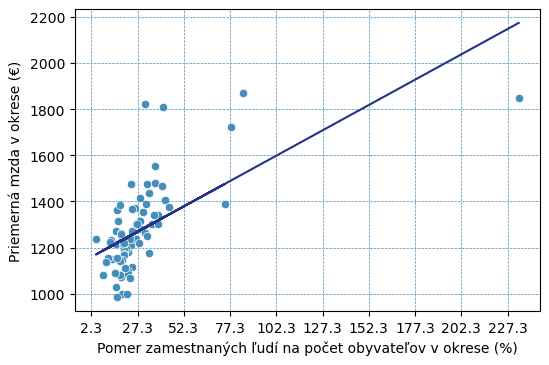

In [13]:
# SIMPLE PLOT OF X AND Y
set_DPI()
fig = sb.scatterplot(x=X, y=Y, color="#458EBC") # hue=year["pocet_gymnazii"]/year["pocet_obyvatelov"]

fig.set_xlabel("Pomer zamestnaných ľudí na počet obyvateľov v okrese (%)")
fig.set_ylabel("Priemerná mzda v okrese (€)")

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b, color="#243187")

plt.xticks(np.arange(min(X)-2.5, max(X), 25))

# correltion coefficient of X and Y
plt.savefig("priemerna_mzda_zamestnanost.png", transparent=True, dpi=300)
print("Correlation coefficient: ", X.corr(Y))

# AVERAGE CORRELATION
# summ = 0
# for i in range(2010,2022):
#     one = years[i]["zamestnanost"] / years[i]["pocet_obyvatelov"] * 100
#     two = years[i]["priemerna_mzda"]
#     print(i, ": ", one.corr(two))
#     summ += one.corr(two)
# print("Average: ", summ/12) 


<AxesSubplot:ylabel='priemerna_mzda'>

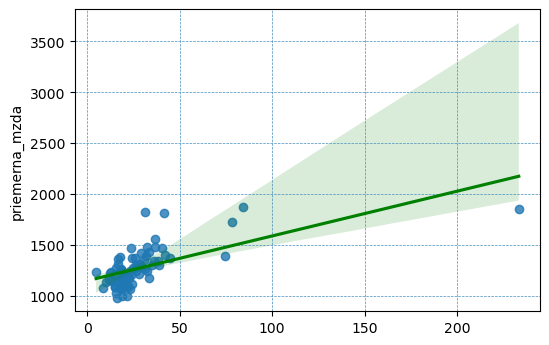

In [14]:
# LINEAR REGRESSION FITED TO PLOT OF X AND Y
set_DPI()
sb.regplot(x=X, y=Y, line_kws={"color": "green"}) # hue="Okres"

### Populacia

### Vzdelanie

In [15]:
# X = year["zamestnanost"] / year["pocet_obyvatelov"] * 100
# Y = year["pocet_gymnazii"] /year["pocet_obyvatelov"]

# Graphs in time

### Trh prace

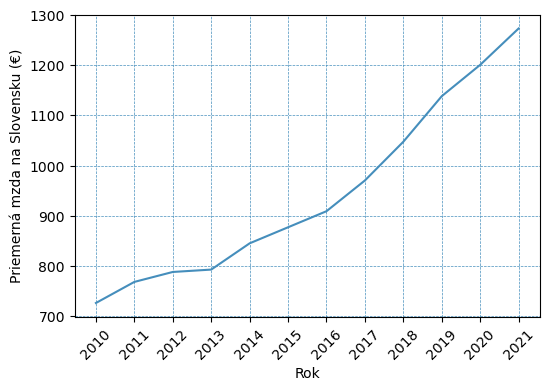

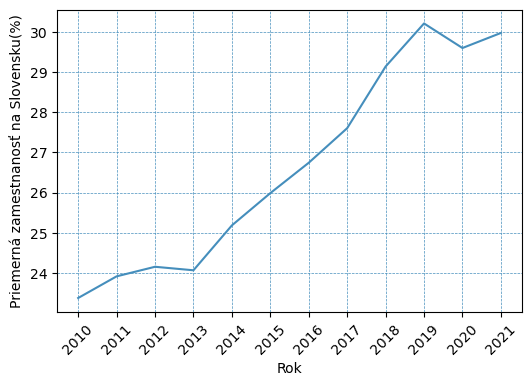

In [16]:

set_DPI()
years_range = range(2010,2022)

# kazdy okres samostatne
# for i in range(len(priemerna_mzda)):
#     fig = sb.lineplot(x=years_range, y=priemerna_mzda.iloc[i][1:])

# priemerna mzda vsetkych okresov
fig = sb.lineplot(x=years_range, y=priemerna_mzda.drop(columns=["Okres"]).mean(), color="#458EBC")

fig.set_xlabel('Rok')
fig.set_ylabel('Priemerná mzda na Slovensku (€)')
plt.xticks(np.arange(2010, 2022, 1.0), rotation=45)
plt.savefig("priemerna_mzda_v_case.png", transparent=True, dpi=300)
plt.show()

set_DPI()
# percento zamestnanych vsetkych okresov v case
priemerna_zamestnanost = []
for year in range(2010,2022):
    priemerna_zamestnanost.append(sum(years[year]["zamestnanost"]) / sum(years[year]["pocet_obyvatelov"]) * 100)
fig = sb.lineplot(x=years_range, y=priemerna_zamestnanost, color="#458EBC")
fig.set_xlabel('Rok')
fig.set_ylabel('Priemerná zamestnanosť na Slovensku(%)')
plt.xticks(np.arange(2010, 2022, 1.0), rotation=45)
plt.savefig("priemerna_zamestnanost_v_case.png", transparent=True, dpi=300)

### Populacia

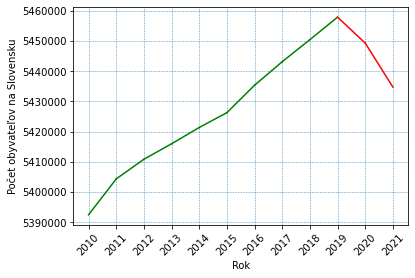

In [17]:
years_range = range(2010,2022)

# percento zamestnanych vsetkych okresov v case
pocet_obyvatelov_total = []
for year in range(2010,2022):
    pocet_obyvatelov_total.append(sum(years[year]["pocet_obyvatelov"]))
fig, ax = plt.subplots()

for x1, x2, y1,y2 in zip(years_range, years_range[1:], pocet_obyvatelov_total, pocet_obyvatelov_total[1:]):
    if y1 > y2:
        plt.plot([x1, x2], [y1, y2], 'r')
    elif y1 < y2:
        plt.plot([x1, x2], [y1, y2], 'g')
    else:
        plt.plot([x1, x2], [y1, y2], 'b')

plt.xlabel("Rok")
plt.ylabel("Počet obyvateľov na Slovensku")
plt.xticks(np.arange(2010, 2022, 1.0), rotation=45)
plt.grid(color = '#458EBC', linestyle = '--', linewidth = 0.5)
ax.ticklabel_format(style='plain')

plt.savefig("pocet_obyvatelov_cas.png", transparent=True, dpi=300, bbox_inches = 'tight')

# Heatmap of Slovak districts

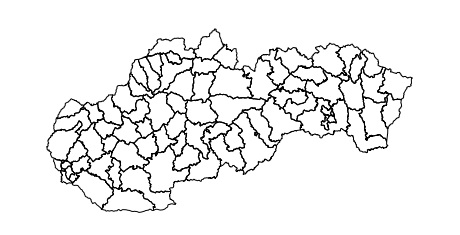

In [18]:
map = gpd.read_file("okresy.json")
geoplot.polyplot(map, projection=gcrs.AlbersEqualArea())
map["TXT"] = map["TXT"].str.replace("okres", "Okres")


### Mzda

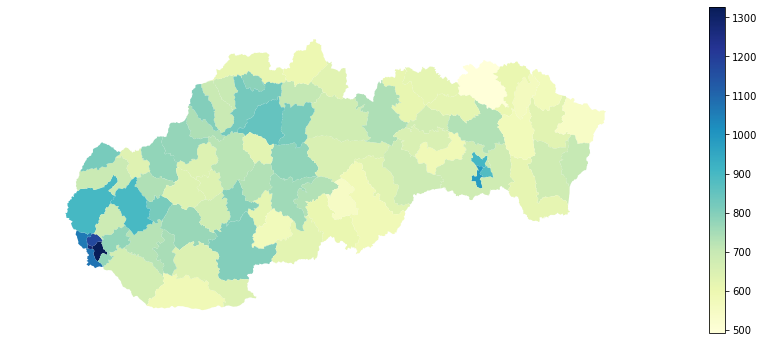

In [32]:
# make heatmap_data array from dataframe column "priemerna_mzda" in years[2021] dataframe, but index it by "Okres" column which is same as map["TXT"] column
YEAR = 2010
heatmap_data = []
for okres_name in map["TXT"]:
    heatmap_data.append(years[YEAR].loc[years[YEAR]["Okres"] == okres_name]["priemerna_mzda"].values[0])

# scheme = mapclassify.Quantiles(heatmap_data, k=10)

geoplot.choropleth(
    map, hue=heatmap_data, cmap="YlGnBu", figsize=(15, 6), projection=gcrs.AlbersEqualArea(), legend=True
)

plt.savefig("map-mzda-2010.png", transparent=True, dpi=300, bbox_inches = 'tight')
# years[2021].head(10)

### Umrtnost

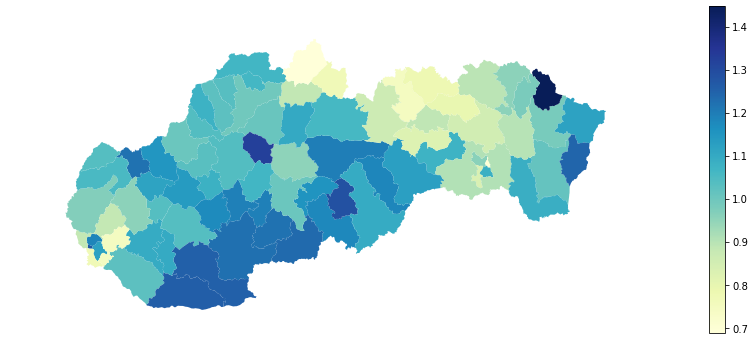

In [33]:
# YEAR = 2021
# heatmap_data = []
# for okres_name in map["TXT"]:
#     zomreti = years[YEAR].loc[years[YEAR]["Okres"] == okres_name]["zomreti"].values[0]
#     pocet_obyvatelov = years[YEAR].loc[years[YEAR]["Okres"] == okres_name]["pocet_obyvatelov"].values[0]
#     heatmap_data.append(zomreti/pocet_obyvatelov*100)

heatmap_data = []

for okres_name in map["TXT"]:
    sum_calculation = 0
    for year in range(2010,2022):
        zomreti_mapa = years[year].loc[years[year]["Okres"] == okres_name]["zomreti"].values[0]
        pocet_obyvatelov_mapa = years[year].loc[years[year]["Okres"] == okres_name]["pocet_obyvatelov"].values[0]
        sum_calculation += zomreti_mapa/pocet_obyvatelov_mapa*100
    heatmap_data.append(sum_calculation/12)

# scheme = mapclassify.Quantiles(heatmap_data, k=10)

geoplot.choropleth(
    map, hue=heatmap_data, cmap="YlGnBu", figsize=(15, 6), projection=gcrs.AlbersEqualArea(), legend=True
)

plt.savefig("umrtnost-mapka-average.png", transparent=True, dpi=300, bbox_inches = 'tight')
# years[2021].head(10)

### Narodenost

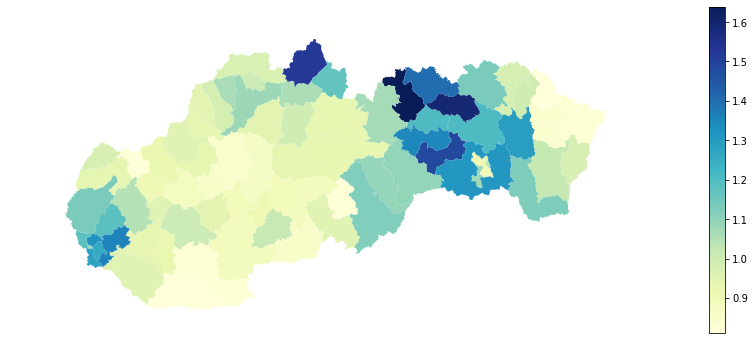

In [34]:
# YEAR = 2010
# heatmap_data = []
# for okres_name in map["TXT"]:
#     narodeni = years[YEAR].loc[years[YEAR]["Okres"] == okres_name]["narodeni"].values[0]
#     pocet_obyvatelov = years[YEAR].loc[years[YEAR]["Okres"] == okres_name]["pocet_obyvatelov"].values[0]
#     heatmap_data.append(narodeni/pocet_obyvatelov*100)

heatmap_data = []
for okres_name in map["TXT"]:
    sum_calculation = 0
    for year in range(2010,2022):
        narodeni_mapa = years[year].loc[years[year]["Okres"] == okres_name]["narodeni"].values[0]
        pocet_obyvatelov_mapa = years[year].loc[years[year]["Okres"] == okres_name]["pocet_obyvatelov"].values[0]
        sum_calculation += narodeni_mapa/pocet_obyvatelov_mapa*100
    heatmap_data.append(sum_calculation/12)

# scheme = mapclassify.Quantiles(heatmap_data, k=10)

geoplot.choropleth(
    map, hue=heatmap_data, cmap="YlGnBu", figsize=(15, 6), projection=gcrs.AlbersEqualArea(), legend=True
)

plt.savefig("narodenost-mapka-average.png", transparent=True, dpi=300, bbox_inches = 'tight')

### Migracia

In [22]:
"""
heatmap_data = []
for okres_name in map["TXT"]:
    sum_calculation = 0
    for year in range(2010,2022):
        vnutorna_migracia_pristahovani = years[year].loc[years[year]["Okres"] == okres_name]["narodeni"].values[0]
        pocet_obyvatelov = years[year].loc[years[year]["Okres"] == okres_name]["pocet_obyvatelov"].values[0]
        sum_calculation += narodeni/pocet_obyvatelov*100
    heatmap_data.append(sum_calculation/12)


# scheme = mapclassify.Quantiles(heatmap_data, k=10)

geoplot.choropleth(
    map, hue=heatmap_data, cmap="YlGnBu", figsize=(15, 6), projection=gcrs.AlbersEqualArea(), legend=True
)

plt.savefig("narodenost-mapka-average.png", transparent=True)
"""

'\nheatmap_data = []\nfor okres_name in map["TXT"]:\n    sum_calculation = 0\n    for year in range(2010,2022):\n        vnutorna_migracia_pristahovani = years[year].loc[years[year]["Okres"] == okres_name]["narodeni"].values[0]\n        pocet_obyvatelov = years[year].loc[years[year]["Okres"] == okres_name]["pocet_obyvatelov"].values[0]\n        sum_calculation += narodeni/pocet_obyvatelov*100\n    heatmap_data.append(sum_calculation/12)\n\n\n# scheme = mapclassify.Quantiles(heatmap_data, k=10)\n\ngeoplot.choropleth(\n    map, hue=heatmap_data, cmap="YlGnBu", figsize=(15, 6), projection=gcrs.AlbersEqualArea(), legend=True\n)\n\nplt.savefig("narodenost-mapka-average.png", transparent=True)\n'

## Histograms

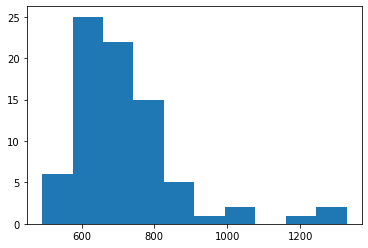

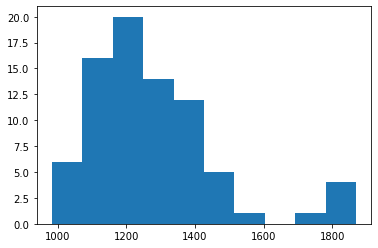

In [23]:
plt.hist(years[2010]["priemerna_mzda"])
plt.show()
plt.hist(years[2021]["priemerna_mzda"])
plt.show()

# Stacked area chart

### Population

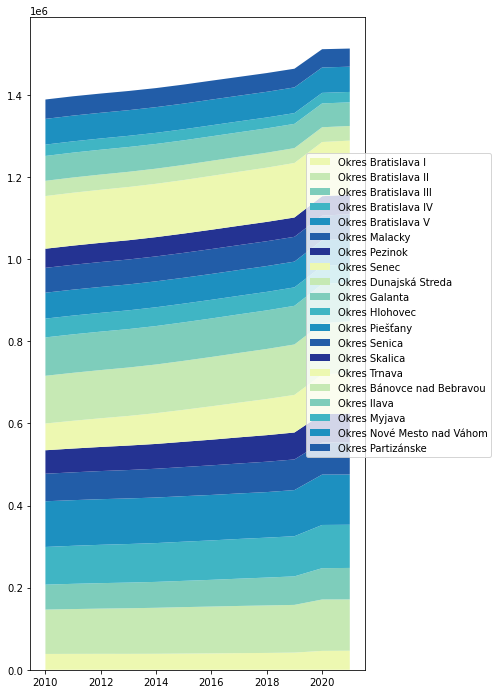

In [24]:
# set_DPI()
okresyy = []
for i in range(20):
    okresyy.append(pocet_obyvatelov.iloc[i][1:].to_list())
# make the fig size bigger of subplots
fig, ax = plt.subplots(figsize=(6, 12))
colors = sb.color_palette("YlGnBu", 7)
plt.stackplot(years_range, okresyy, labels=pocet_obyvatelov["Okres"].to_list()[:20], colors=colors)
plt.legend(loc = "upper center", bbox_to_anchor=(1.1, 0.8), ncol=1)
plt.show()

# Anomalies

In [25]:
# yyy = pd.DataFrame()
# for y in range(2010,2022):
    # yyy[years[2010].iloc[47][1:].keys().to_list()[y - 2011]] = years[y].iloc[47][1:].to_list()
# print(yyy)

# print(yyy.corr())
# .corr()
# dataplot=sb.heatmap(sum_of_correlations, annot=True, cmap="YlGnBu", ax = ax)

In [26]:
# find Presov okres in dataframe and get row
# print(years[2010].iloc[47])
yy = pd.DataFrame(years[2010].columns)
# print(yy)
# yy = pd.DataFrame("pocet_obyvatelov": {}, "narodeni": {}, "zomreti": {}, "vnutorna_migracia_pristahovani": {}, vnutorna_migracia_vystahovani )
# years[2010].iloc[47].drop("Okres")

# df.append({'Name':'Jane', 'Age':25, 'Location':'Madrid'}, 

<AxesSubplot:>

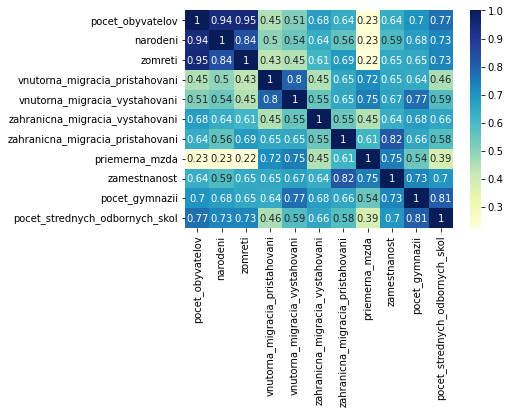

In [27]:
sb.heatmap(years[2010].corr(), annot=True, cmap="YlGnBu")